In [1]:
import numpy as np 
import pandas as pd 

In [2]:
movie = pd.read_csv("movies1.csv")

In [4]:
movie.shape

(9742, 3)

In [5]:
rt = pd.read_csv("ratings1.csv")

In [6]:
rt.shape

(100836, 4)

In [7]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
rt['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
rt['userId'].nunique()

610

In [10]:
rt.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
rt.groupby('rating').max()

,userId,movieId,timestamp
rating,,,
0.5,610,184641,1537158378
1.0,610,190221,1537158428
1.5,610,190215,1537757059
2.0,610,185033,1537158460
2.5,610,189713,1537757040
3.0,610,193567,1537674946
3.5,610,193587,1537470521
4.0,610,193609,1537799250
4.5,610,191005,1537632293


In [12]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
tg = pd.read_csv('tags1.csv')

In [14]:
tg.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
lk = pd.read_csv('links1.csv')

In [16]:
lk.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [17]:
mrt = rt['movieId'].value_counts().idxmax()

mrtd = movie[movie['movieId'] == mrt]

print(mrtd[['movieId', 'title']])


     movieId                title
314      356  Forrest Gump (1994)


In [18]:
matrix = movie[movie['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]
matrix_tags = tg[tg['movieId'] == matrix]

print(matrix_tags[['userId', 'tag']])

      userId                 tag
815      424        martial arts
816      424              sci-fi
1646     474  alternate universe
2794     537          philosophy
2795     537    post apocalyptic


In [19]:
terminator2 = movie[movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

terminator2_rt = rt[rt['movieId'] == terminator2]

art = terminator2_rt['rating'].mean()

print(art)

3.970982142857143


In [20]:
fightclub = movie[movie['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fightclub_rt = rt[rt['movieId'] == fightclub]

plt.figure(figsize=(10, 6))
plt.hist(fightclub_rt['rating'], bins=5, color='red', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('No of Users')
plt.show()

NameError: name 'plt' is not defined

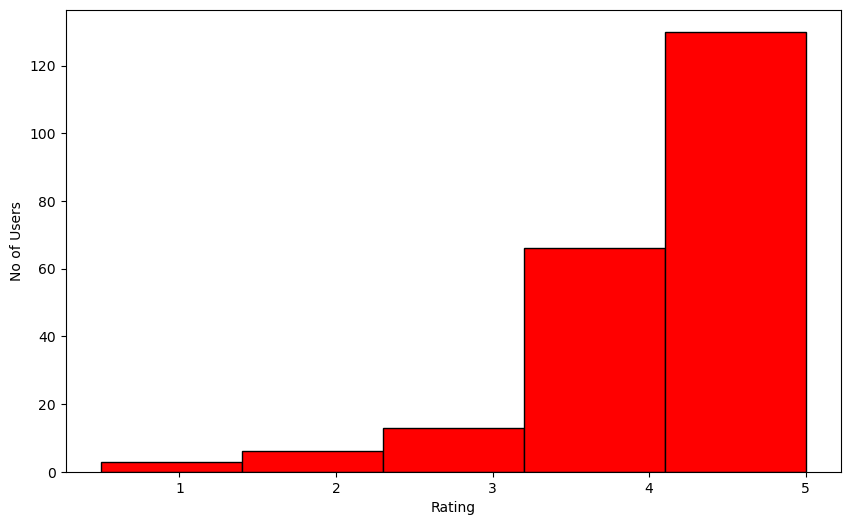

In [21]:
import matplotlib.pyplot as plt
fightclub = movie[movie['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fightclub_rt = rt[rt['movieId'] == fightclub]

plt.figure(figsize=(10, 6))
plt.hist(fightclub_rt['rating'], bins=5, color='red', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('No of Users')
plt.show()

In [23]:
ratings = rt.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings.columns = ['movieId', 'rating_count', 'rating_mean']
merged = pd.merge(movie, ratings, on='movieId', how='inner')
filtered = merged[merged['rating_count'] > 50]
print(filtered.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [25]:
popular = filtered.loc[filtered['rating_mean'].idxmax()]

In [26]:
popular[['movieId', 'title']]

movieId                                 318
title      Shawshank Redemption, The (1994)
Name: 277, dtype: object

In [27]:
popular5 = filtered.sort_values(by='rating_count', ascending=False).head(5)

In [28]:
popular5[['movieId', 'title', 'rating_count']]

,movieId,title,rating_count
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278


In [30]:
sci_fi = filtered[filtered['genres'].str.contains('Sci-Fi', case=False)]

In [31]:
sorted_sci_fi = sci_fi.sort_values(by='rating_count', ascending=False)

In [33]:
popular_sci_fi = sorted_sci_fi.iloc[2]
popular_sci_fi[['movieId', 'title', 'rating_count']]

movieId                          480
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object